<a href="https://colab.research.google.com/github/imend35/verianalizokulu-yapayzeka-python/blob/main/%C4%B0%C3%A7_Ticaret_Aktivitesi_Mevsimsellik_ve_B%C3%B6lgesel_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def ic_ticaret_verisi_olustur():
    # Aylık veriler için 12 ay serisi oluşturma
    aylar = pd.to_datetime(pd.date_range(start='2024-01-01', periods=12, freq='M'))

    # İşyeri Kuruluş Sayısı Simülasyonu (İstanbul)
    # İlkbahar (3-5. aylar) ve Sonbahar (9-11. aylar) civarında artış eğilimi
    kurulus_sayilari = [2500, 2700, 3100, 3300, 3250, 2900, 2600, 2800, 3050, 3150, 2950, 2550]

    df = pd.DataFrame({
        'Kurulus_Sayisi': kurulus_sayilari
    }, index=aylar)

    # Ay ismini kolayca alabileceğimiz bir sütun ekleme
    df['Ay'] = df.index.strftime('%B')

    return df

In [2]:
def mevsimsel_analiz(df):

    # En yüksek ve en düşük kuruluş sayısını bulma
    en_aktif_ay = df['Kurulus_Sayisi'].idxmax().strftime('%B')
    en_pasif_ay = df['Kurulus_Sayisi'].idxmin().strftime('%B')

    max_sayi = df['Kurulus_Sayisi'].max()
    min_sayi = df['Kurulus_Sayisi'].min()

    # Aylık ortalama aktiviteyi hesaplama
    ortalama_aktivite = df['Kurulus_Sayisi'].mean()

    print("\n--- İç Ticaret Aktivitesi Özeti (İstanbul) ---")
    print(f"Yıllık Ortalama Aylık Kuruluş: {ortalama_aktivite:.0f} Adet")
    print(f"En Aktif Ay (Zirve): {en_aktif_ay} ({max_sayi} Adet)")
    print(f"En Pasif Ay (Dip): {en_pasif_ay} ({min_sayi} Adet)")

    return df

In [3]:
def mevsimsellik_grafik_ciz(df):

    plt.figure(figsize=(12, 6))

    # Çizgi Grafiği Oluşturma
    plt.plot(df['Ay'], df['Kurulus_Sayisi'], marker='o', linestyle='-', color='darkblue')

    # Zirve ve Dip Noktalarını İşaretleme
    max_value = df['Kurulus_Sayisi'].max()
    max_index = df['Ay'].iloc[df['Kurulus_Sayisi'].idxmax().month - 1] # Ay adını alır
    plt.scatter(max_index, max_value, color='red', s=100, label='Zirve Ay')

    min_value = df['Kurulus_Sayisi'].min()
    min_index = df['Ay'].iloc[df['Kurulus_Sayisi'].idxmin().month - 1]
    plt.scatter(min_index, min_value, color='green', s=100, label='Dip Ay')

    plt.title("Aylık İşyeri Kuruluş Sayısı Mevsimsel Eğilimi", fontsize=16)
    plt.xlabel("Ay")
    plt.ylabel("Kuruluş Sayısı")
    plt.legend()
    plt.grid(axis='y', linestyle='--')

    plt.show()

--- Proje 5: İç Ticaret Mevsimsellik Analizi Başladı ---

--- İç Ticaret Aktivitesi Özeti (İstanbul) ---
Yıllık Ortalama Aylık Kuruluş: 2904 Adet
En Aktif Ay (Zirve): April (3300 Adet)
En Pasif Ay (Dip): January (2500 Adet)


/tmp/ipython-input-2568621860.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aylar = pd.to_datetime(pd.date_range(start='2024-01-01', periods=12, freq='M'))


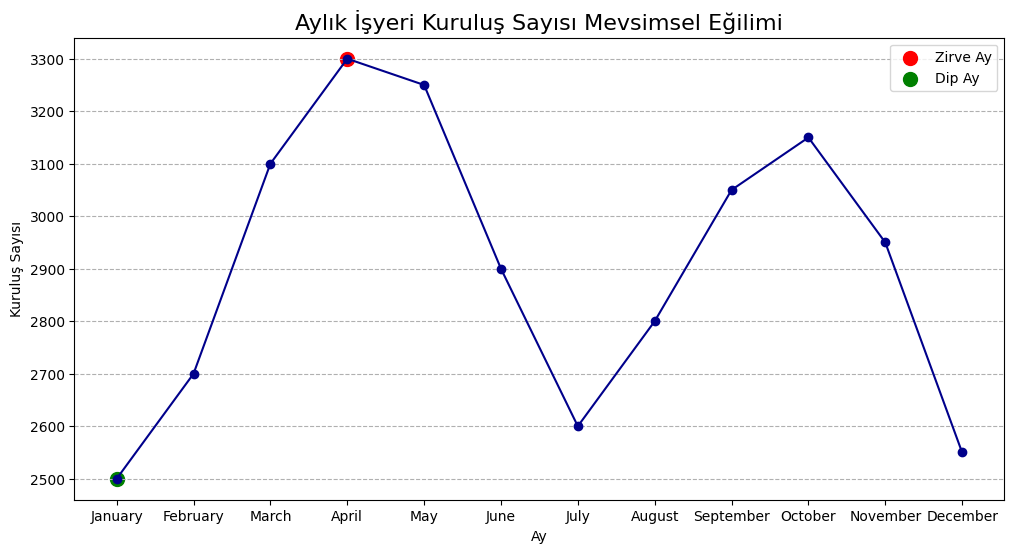

In [4]:
# --- ANA ÇALIŞMA BLOKU ---
print("--- Proje 5: İç Ticaret Mevsimsellik Analizi Başladı ---")

try:
    ticaret_df = ic_ticaret_verisi_olustur()

    # Analizi Yap
    analiz_df = mevsimsel_analiz(ticaret_df)

    # Grafik
    mevsimsellik_grafik_ciz(analiz_df)

except Exception as e:
    print(f"[HATA] İşlem sırasında beklenmeyen bir hata oluştu: {e}")